# Project: Predicting Boston Housing Prices

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


# Implementation: Calculate Statistics

In [7]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


# Question 1 - Feature Observation

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Answer:

- 'RM' is positively correlated: A higher 'RM' usually indicates more space which could be more expensive.
- 'LSTAT' is negatively correlated: People from lower class usually can't afford high housing price so when 'LSTAT' is high, the housing price is more likely to be cheap.
- 'PTRATIO' is negatively correlated: A lower 'LSTAT' means that teacher could pay more attention to each of students which indicates a better education, so that would be more expensive.

Linear regression could be used to justify the intuition that the gradient is positive for a positive relationship and negative for a negative relationship.

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def justify_intuition(data, feature_name):
    reg = LinearRegression()
    features = data[feature_name].reshape(-1, 1)
    reg.fit(features, prices)
    plt.plot(features, reg.predict(features), color='red', linewidth=1)
    plt.scatter(features, prices, alpha=0.5, c=prices)
    plt.xlabel(feature_name)
    plt.ylabel('PRICE')
    plt.show()

C:\Users\Anurag Garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


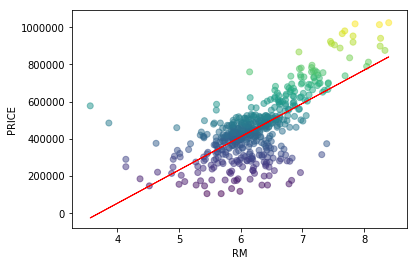

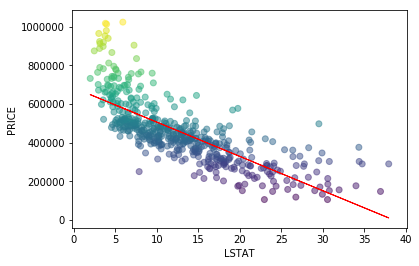

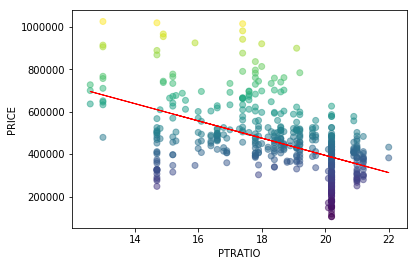

In [9]:
# show relationship for each feature
justify_intuition(data, 'RM')
justify_intuition(data, 'LSTAT')
justify_intuition(data, 'PTRATIO')

# Developing a Model

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Question 2 - Goodness of Fit

In [12]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


#### Answer:
R2 could be interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Since 0.923 is a pretty high value in range 0 to 1, so I think it is successful.

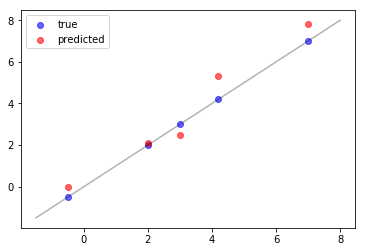

In [13]:
#created by anurag garg
# visual representation

# Plot ture values
true= [3, -0.5, 2, 7, 4.2]
true_handle = plt.scatter(true, true, alpha=0.6, color='blue', label='true')

# Plot predicted values
pred = [2.5, 0, 2.1, 7.8, 5.3]
pred_handle = plt.scatter(true, pred, alpha=0.6, color='red', label='predicted')

# Reference line
fit = np.poly1d(np.polyfit(true, true, 1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

# Legend and show
plt.legend(handles=[true_handle, pred_handle], loc='upper left')
plt.show()

### Implementation: Shuffle and Split Data

In [15]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=7, test_size=0.20)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


## Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Hint: What could go wrong with not having a way to test your model?

## Answer: 
By splitting dataset into trainning and testing subset, we have a good way to mearsure our trained model since it never sees testing data before. And thus it's possible to find and prevent overfitting.

## Analyzing Model Performance

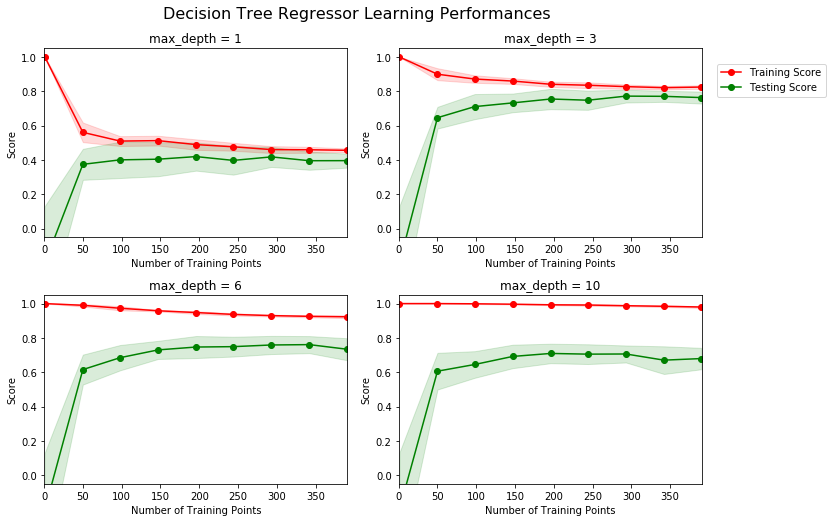

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

## Question 4 - Learning the Data

### Answer: 
I'd like to choose the one with max_depth = 3. As more training points are fed, both training curve and testing curve are converging to about 0.8 score.

Having more training points will benefit the model by making curve converge. Once converged, adding more training points seems to have no significant help. At least it won't hurt the accuracy but there's a trade-off here that acquiring or trainning more data might cost a lot. A good balance is needed here.

## Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

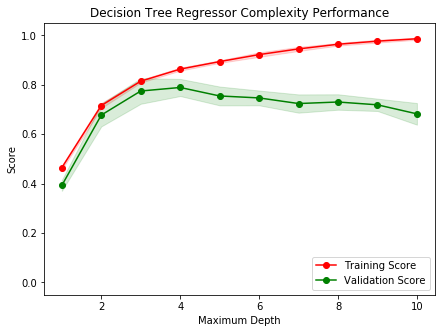

In [17]:
vs.ModelComplexity(X_train, y_train)

## Question 5 - Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

#### Answer:

With a maximun depth of 10, model suffers from high variance since training score is 1.0 but validation score is about 0.7 it turns out our model is overfitting and too sensitive to the dataset.
With a maximum depth of 1, model suffers from high bias. Two scores are quit close that it's not a high variance problem and both scores are too far from acceptable so I think it's a high bias problem.

## Question 6 - Best-Guess Optimal Model3

Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?

### Answer: 
4 .
As max_depth increases, bias becomes lower and variance becomes higher. I want to keep a banlance between these tow. After depth 4, two scores diverge and validation score starts to goes down, so I know it begins to suffer from high variance and 4 is a good choice. And of course it has the highest validation score.

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

### Question 7 - Grid Search
What is the grid search technique and how it can be applied to optimize a learning algorithm?

### Answer: 
Grid search is a common pratice for tuning hyperparameters. Basically what it does is that:

- For each hyperparameter, selects a small ﬁnite set of values to explore.
- Then trains a model for every joint specification of hyperparameter values in the Cartesian product of the set of values for each individual hyperparameter.
- Find best parameter values and stop or pick a more precise value range to repeat step 1 and 2.

### Question 8 - Cross-Validation

What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?

### Answer: 
It's a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. Different from Question 3, what it does is that:

- The data set is divided into k subsets, and the train&test procedure is repeated k times.
- Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set.

The benefit is that it matters less how the data gets divided, every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. In this way, model will suffer less from high variance. Otherwise, GridSearch may return a tuned model that relies on a specific division of train and test sets but predict poorly in a general situation.

## Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In [20]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.1, train_size=None, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\Anurag Garg\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

### Answer:

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

In [ ]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home - ${:,.2f} .".format(i+1, price))

#### Answer: 
I think the result is reasonable since it follows the intuition I answered in Question 1 that RM is positively correlated and LSTAT&PTRARIO are negatively corrlated to the housing price. For example, client 3 with 8 rooms > client 1 with 5 rooms > client 2 with 4 rooms.

In [ ]:
vs.PredictTrials(features, prices, fit_model, client_data)

Range in prices: $148,166.67

### Question 11 - Applicability
In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

### Answer: 
I believe it's not reliable for real world settings, many things changed. For example, nowadays online eduction like Udacity, Coursera and Edx is widely accessible so LSTAT may not have same predictive power as in 1978. And many new factors have shown up and become extremely important while our model didn't capture them.